In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
from sklearn import model_selection
from sklearn import linear_model

In [4]:
import shap
shap.initjs()
mpl.rc('axes', facecolor='white', grid=False)  # override some of ggplot

In [5]:
m = sm.datasets.anes96
df = m.load_pandas().data
df_raw = df

In [6]:
df = df_raw
df_X = df[['PID', 'selfLR', 'ClinLR']]
s_y = df.vote
X_raw = df_X.values
y_raw = s_y.values

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_raw, y_raw,
    test_size=0.4,
    random_state=20200502
)
# shorthands: reg
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)
reg_1 = reg

In [8]:
# TODO: shouldn't use shorthands like explainer, etc across cells
explainer = shap.LinearExplainer(reg_1, X_train)
expected_value = explainer.expected_value
shap_values = explainer.shap_values(X_test)

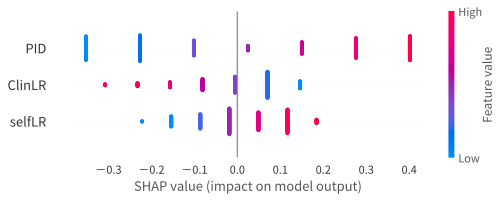

In [9]:
shap.summary_plot(shap_values,
                  X_test,
                  feature_names=df_X.columns)

The vertical lengths are the sample size:

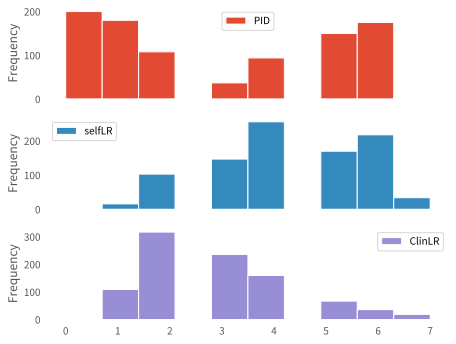

In [10]:
df_X.plot.hist(subplots=True)
plt.show()

In [11]:
i = 0
shap.force_plot(expected_value,
                shap_values[i,:],
                X_test[i,:],
                feature_names=df_X.columns)

In [12]:
shap.force_plot(expected_value,
                shap_values,
                X_test,
                feature_names=df_X.columns)

In [13]:
shap.force_plot(expected_value,
                shap_values,
                X_test,
                feature_names=df_X.columns,
                link='logit')

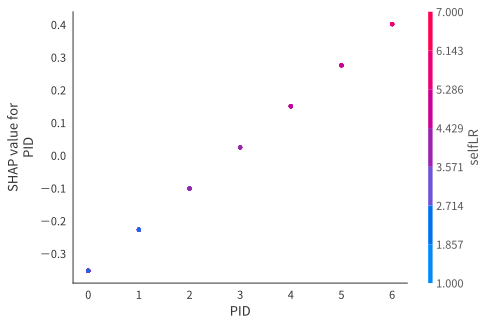

In [14]:
shap.dependence_plot('PID',
                     shap_values,
                     X_test,
                     feature_names=df_X.columns)

> To help reveal these interactions dependence_plot automatically selects another feature for coloring. [[ref]](https://github.com/slundberg/shap)

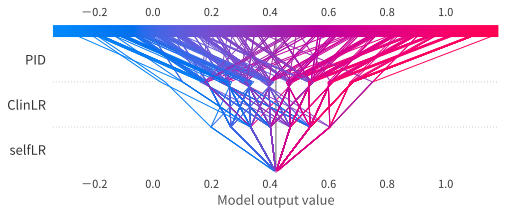

In [15]:
shap.decision_plot(expected_value,
                   shap_values,
                   feature_names=list(df_X.columns))

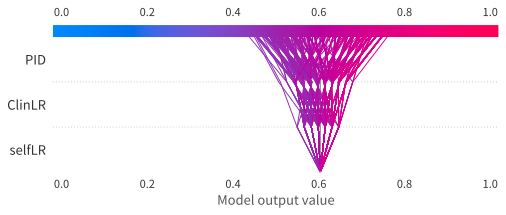

In [16]:
shap.decision_plot(expected_value, shap_values,
                   feature_names=list(df_X.columns),
                   link='logit')